In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

#load files
train = pd.read_csv('../inputs/train.csv', parse_dates=['timestamp'])
test = pd.read_csv('../inputs/test.csv', parse_dates=['timestamp'])
id_test = test.id

In [2]:
train['price_doc'].describe()

count    3.047100e+04
mean     7.123035e+06
std      4.780111e+06
min      1.000000e+05
25%      4.740002e+06
50%      6.274411e+06
75%      8.300000e+06
max      1.111111e+08
Name: price_doc, dtype: float64

In [3]:
trainsub = train[train.price_doc > 1000000]
trainsub[['price_doc', 'num_room', 'life_sq', 'full_sq']].sort_values('price_doc')

,price_doc,num_room,life_sq,full_sq
6805,1005000,NaN,44.0,60
661,1007000,NaN,16.0,35
10419,1015000,3.0,38.0,55
27236,1020000,2.0,29.0,49
6713,1020000,NaN,19.0,31
14800,1020000,1.0,17.0,35
227,1030000,NaN,17.0,39
841,1030000,NaN,50.0,86
23559,1030000,2.0,25.0,40
16454,1050000,3.0,34.0,52


In [4]:
trainsub['price_doc'].describe()

count    2.949100e+04
mean     7.327204e+06
std      4.723589e+06
min      1.005000e+06
25%      4.940760e+06
50%      6.350000e+06
75%      8.400000e+06
max      1.111111e+08
Name: price_doc, dtype: float64

In [5]:
np.percentile(trainsub['price_doc'], 90)

11903597.0

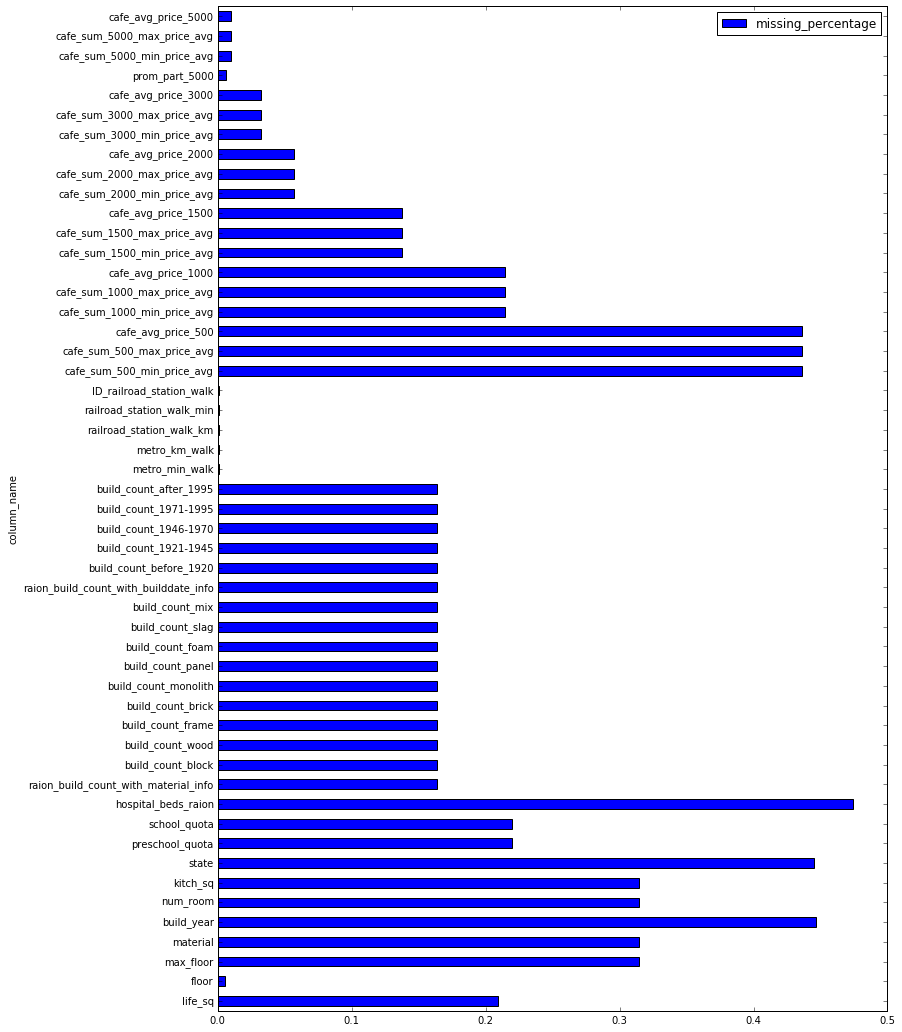

In [6]:
missing_df = (train.isnull().sum(axis=0) / train.shape[0]).reset_index()
missing_df.columns = ['column_name', 'missing_percentage']
missing_df = missing_df.ix[missing_df['missing_percentage']>0]
missing_df = missing_df.set_index('column_name')
missing_df.plot(kind='barh',figsize=(12,18))
plt.show()


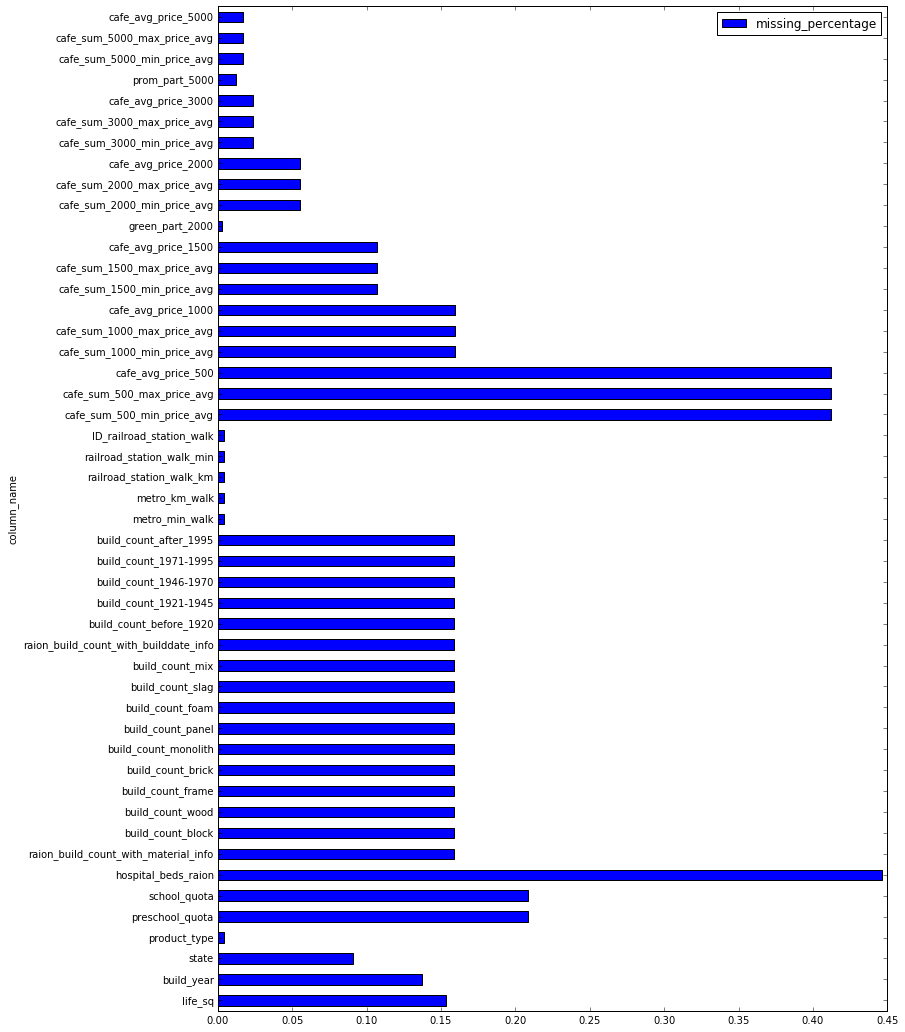

In [7]:
missing_df = (test.isnull().sum(axis=0) / test.shape[0]).reset_index()
missing_df.columns = ['column_name', 'missing_percentage']
missing_df = missing_df.ix[missing_df['missing_percentage']>0]
missing_df = missing_df.set_index('column_name')
missing_df.plot(kind='barh',figsize=(12,18))
plt.show()

In [8]:
trainsub.ix[3527, 'full_sq'] = np.nan
trainsub.ix[13546, 'life_sq'] = np.nan
trainsub.ix[9646, 'life_sq'] = 82


c:\python34\lib\site-packages\pandas\core\indexing.py:476: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


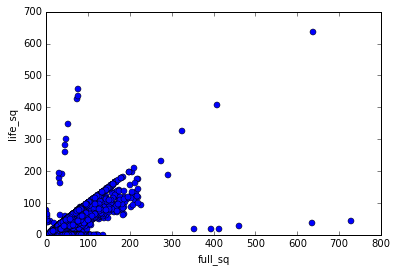

In [10]:
plt.plot(trainsub['full_sq'], trainsub['life_sq'], 'o')
plt.ylabel('life_sq')
plt.xlabel('full_sq')
plt.show()

In [11]:
trainsub[(trainsub['life_sq'] > 200) & (trainsub['full_sq']<200)][['price_doc', 'num_room', 'life_sq', 'full_sq']]

,price_doc,num_room,life_sq,full_sq
1084,6200000,NaN,281.0,44.0
4385,11918400,NaN,426.0,73.0
9237,5600000,2.0,301.0,47.0
9256,13750000,3.0,458.0,77.0
13629,4900000,2.0,259.0,45.0
21080,7200000,3.0,349.0,52.0
26342,12900000,3.0,435.0,75.0


In [12]:
test[test['life_sq'] > test['full_sq']][[ 'num_room', 'life_sq', 'full_sq']]

,num_room,life_sq,full_sq
64,1,30.60,29.80
119,3,104.28,100.04
171,2,60.00,57.80
464,1,37.80,0.00
601,2,742.00,74.20
1896,1,361.00,36.10
2027,3,93.20,51.90
2031,2,237.00,40.20
2791,3,869.00,86.90
2804,1,33.80,14.80


In [ ]:
# full --> life
for i in [464, 5383]:
    test.ix[i, 'full_sq'] = test.ix[i, 'life_sq']
    
# life --> full
for i in [601, 1896, 2791, 2031, 5187]:
    test.ix[i, 'life_sq'] = test.ix[i, 'full_sq']


In [25]:
# if small full_sq replace it with life_sq. If both small, put nans for both
mask_toosmall = test['full_sq'] < 10
test.ix[mask_toosmall, 'full_sq'] = test.ix[mask_toosmall, 'life_sq']
mask_toosmall = test['full_sq'] < 10
test.ix[mask_toosmall, 'full_sq'] = np.nan
test.ix[mask_toosmall, 'life_sq'] = np.nan

test.ix[test['life_sq'] < 10, 'life_sq'] = np.nan

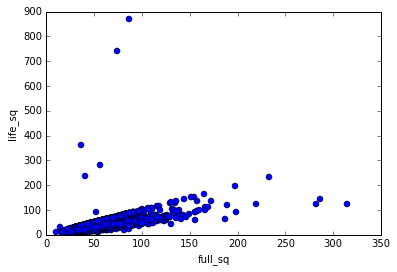

In [26]:
plt.plot(test['full_sq'], test['life_sq'], 'o')
plt.ylabel('life_sq')
plt.xlabel('full_sq')
plt.show()